# Introduction to Cross-Validation - Lab

## Introduction

In this lab, you'll be able to practice your cross-validation skills!


## Objectives

You will be able to:

- Compare the results with normal holdout validation
- Apply 5-fold cross validation for regression

## Let's get started

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns = ['target'])

## Train test split

Perform a train-test-split with a test set of 0.20.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
print(X_train.shape, y_train.shape)

(404, 5) (404, 1)


Fit the model and apply the model to the make test set predictions

In [6]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

Calculate the residuals and the mean squared error

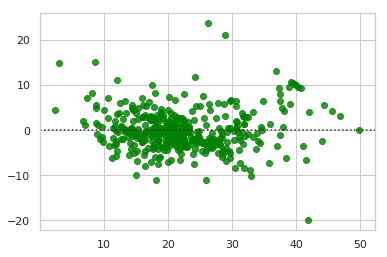

In [7]:
import seaborn as sns
sns.set(style="whitegrid")

y_train_pred = lm.predict(X_train)

# Plot the residuals after fitting a linear model
sns.residplot(y_train_pred, y_train, color="green")

## Cross-Validation: let's build it from scratch!

### Create a cross-validation function

Write a function k-folds that splits a dataset into k evenly sized pieces.
If the full dataset is not divisible by k, make the first few folds one larger then later ones.

We want the folds to be a list of subsets of data!

In [24]:
def kfolds(data, k):
    # Force data as pandas dataframe
    df = pd.DataFrame(data)
    # add 1 to fold size to account for leftovers
    remainder = int(len(df)) % k
    fold_size = len(df) // k
    subsets = []
    start = 0
    
    
    for i in range(0, k):
        if remainder > 0:
            subset = df.iloc[start: start + fold_size + 1]
            subsets.append(subset)
            start += fold_size+1
            remainder -= 1
        else:
            subset = df.iloc[start: start + fold_size]
            subsets.append(subset)
            start += fold_size
    return subsets

### Apply it to the Boston Housing Data

In [35]:
# Make sure to concatenate the data again
df = pd.concat([y, X], axis = 1)

In [42]:
folds = kfolds(df, 5)
folds[0]

,target,CHAS,RM,DIS,B,LSTAT
0,24.0,0.0,6.575,0.542096,1.000000,-1.275260
1,21.6,0.0,6.421,0.623954,1.000000,-0.263711
2,34.7,0.0,7.185,0.623954,0.989737,-1.627858
3,33.4,0.0,6.998,0.707895,0.994276,-2.153192
4,36.2,0.0,7.147,0.707895,1.000000,-1.162114
5,28.7,0.0,6.430,0.707895,0.992990,-1.200048
6,22.9,0.0,6.012,0.671500,0.996722,0.248456
7,27.1,0.0,6.172,0.700059,1.000000,0.968416
8,16.5,0.0,5.631,0.709276,0.974104,1.712312
9,18.9,0.0,6.004,0.743201,0.974305,0.779802


### Perform a linear regression for each fold, and calculate the training and test error

Perform linear regression on each and calculate the training and test error.

In [ ]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = None
    test = None
    # Fit a linear regression model
    
    #Evaluate Train and Test Errors

# print(train_errs)
# print(test_errs)

## Cross-Validation using Scikit-Learn

This was a bit of work! Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.

Next, calculate the mean of the MSE over the 5 cross-validations and compare and contrast with the result from the train-test-split case.

##  Summary 

Congratulations! You now practiced your knowledge on k-fold crossvalidation!